<a href="https://colab.research.google.com/github/PundirShivam/Portfolio/blob/master/Greeks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Valuing a call-option using BSM Formulae
# with no dividents
# Here Cases which have closed analytical solutions are considered
# More advanced approaches are discussed elsewhere in respective chapters
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import numpy as np
import pandas as pd

In [ ]:
# d1 & d2 
def f_d1(So,K,T,r,sigma,t=0,q=0):
  from scipy import stats
  import math
  import numpy as np
  return (np.log(So/K) + (r-q+.5*sigma**2)*(T-t))/(sigma*math.sqrt(T-t))

def f_d2(So,K,T,r,sigma,t=0,q=0):
  import math
  return f_d1(So,K,T,r,sigma,t,q)-sigma*math.sqrt(T-t)


In [ ]:
def BSM_call_value(So,K,T,r,sigma,t=0,q=0):
  '''
  BSM formaule for valuing European call option
  Parameters:
  So : index/stock level today
  K  : strike price of option
  t  : valuation date
  T  : Time to maturity of option (days)
  r  : short term interest rate
  sigma : std. of returns i.e. volatility of index
  q   : q=0 (i.e. divident yield)
  Output:
  Co = call option value today
  '''
  from scipy import stats
  import math
  import numpy as np
  #d1 = (np.log(So/K) + (r-q+.5*sigma**2)*(T-t))/(sigma*math.sqrt(T-t))
  d1= f_d1(So,K,T,r,sigma,t,q)
  d2= f_d2(So,K,T,r,sigma,t,q)
  #d2 = d1-sigma*math.sqrt(T)
  Co =  So*math.exp(-q*T)*stats.norm.cdf(d1,0,1) - K*math.exp(-r*(T-t))*stats.norm.cdf(d2,0,1)
  return Co
  

In [ ]:
# Se^(-q*T) + P = C + Ke^(-rT)
# >> P = C + Ke^(-rT) - Se^(-q*T)
# Using put call parity we can value put option also

def BSM_put_value(So,K,T,r,sigma,t=0,q=0):
  '''
  BSM formaule for valuing European put option
  Parameters:
  So : index/stock level today
  K  : strike price of option
  t  : valuation date
  T  : Time to maturity of option (days)
  r  : short term interest rate
  sigma : std. of returns i.e. volatility of index
  q   : q=0 (i.e. divident yield)
  Output:
  Po = call option value today
  '''
  import math
  Co = BSM_call_value(So,K,T,r,sigma,t,q)
  Po = Co + K*math.exp(-r*(T-t)) - So*math.exp(-q*(T-t))
  return Po

In [ ]:
print(" Value of Europen Call option is ${0:.2f}".format(BSM_call_value(So=105,K=100,t=0,T=1,r=0.05,sigma=.25)))
print(" Value of Europen Put option is ${0:.2f}".format(BSM_put_value(105,100,1,0.05,.25)))

 Value of Europen Call option is $15.65
 Value of Europen Put option is $5.78


In [ ]:
## Option Valuation using CRR Cox-Ross-Rubinstein Approach
# i.e. binomial option pricing

def CRR_value_option(So,K,T,r,sigma,M=1000,call=True):
  '''
  Binomial option pricing for valuing European Call Option
  Parameters:
  So : index/stock level today
  K  : strike price of option
  T  : Time to maturity of option (days)
  r  : short term interest rate
  sigma : std. of returns i.e. volatility of index
        Also, constant volatility factor of diffusion
  M : no. of time-steps to be considered till time to maturity
      As M increases the CRR_model value approached BSM value
  call : True will return value of call option
         False will return value of put option
  Output:
  
  Vo = call/put option value today
  '''
  import math
  import numpy as np
  
  # time parameters
  dt = T/ M # length of time interval
  df = math.exp(-r*dt) # discount factor per time interval
  # this will be used for discounting back cfs backwards from end point
 
  
  # binomial paramters
  u = math.exp(sigma*math.sqrt(dt)) # up-movement
  d = 1/u # down-movement
  q = (math.exp(r*dt)-d)/(u-d) # martiangle (risk-neutral probability)
  
  
  # Array Initialization for Index Levels
  mu = np.arange(M + 1)
  mu = np.resize(mu, (M + 1, M + 1))
  md = np.transpose(mu)
  mu = u ** (mu - md)
  md = d ** md
  S = So * mu * md

  # Valuation by Risk-Neutral Discounting
  
  if call:
    pv = np.maximum(S-K, 0) # present value array initialized with inner values
  else: 
    pv = np.maximum (K-S, 0) # present value array initialized with inner values
  z = 0
  for i in np.arange(M - 1, -1, -1): # backwards induction
    pv[0:M - z, i] = (q * pv[0:M - z, i + 1] + (1 - q) * pv[1:M - z + 1, i + 1]) * df
    z += 1
  Vo = pv[0,0]
  return Vo

"""
NOTE: please come back to it again

"""

'\nNOTE: please come back to it again\n\n'

In [ ]:
print(" Value of Europen Call option is ${0:.2f}".format(CRR_value_option(105,100,1,0.05,.25,call=True)))
print(" Value of Europen Put option is ${0:.2f}".format(CRR_value_option(105,100,1,0.05,.25,call=False)))

 Value of Europen Call option is $15.65
 Value of Europen Put option is $5.78


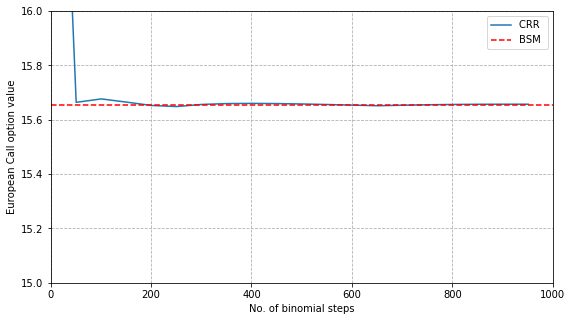

In [ ]:
## CRR converges to BSM from below

steps = np.arange(1,1000,50)
CRR_values = np.array([CRR_value_option(105,100,1,0.05,.25,M,call=True) for M in steps])
plt.figure(figsize=(9,5))
plt.plot(steps,CRR_values,label='CRR ')
plt.axhline(BSM_call_value(So=105,K=100,t=0,T=1,r=0.05,sigma=.25),color='r',lw=1.5,ls='dashed',label='BSM ')
plt.ylim(15,16)
plt.xlabel('No. of binomial steps')
plt.ylabel('European Call option value')
plt.legend()
plt.xlim(0,1000)
plt.grid(ls='dashed')

In [ ]:
# leaving out FFT for now

In [ ]:
# using monte carlo to option call/put option value


def monte_carlo_option(So,K,T,r,sigma,paths=1000000,call=True):
  
  """
  simple monte carlo implementation to value call/put options
  
  Additionally, new paramater:
  paths : no. of paths to be considered
  
  Output:
  Vo: value of option i.e. call if call=True
  or, put call=False
  
  """
  import numpy as np
  z = np.random.standard_normal(paths) # this is the Z_t i.e. uncertanity used part of the last term
  df = np.exp(-r*T) # continously compunded discount factor
  
  # final simulated stock price based discrete form of stock price 
  S = np.array([So*np.exp((r-.5*sigma**2)*T+(sigma*np.sqrt(T)*z_t)) for z_t in z] )
  if call:
    payoff = np.maximum(S-K,0)
  else:
    payoff = np.maximum(K-S,0)
  Vo = df*np.sum(payoff)/paths # we are discounting back the average payoff that will be received at maturity
  # why not other way around? See Cauchy inequality
  
  return Vo

In [ ]:
print('OPTION VALUATION USING MONTE CARLO TECHNIQUES')
print(" Value of Europen Call option is ${0:.2f}".format(monte_carlo_option(105,100,1,0.05,.25,paths=10000,call=True)))
print(" Value of Europen Put option is ${0:.2f}".format(monte_carlo_option(105,100,1,0.05,.25,paths=10000,call=False)))

OPTION VALUATION USING MONTE CARLO TECHNIQUES
 Value of Europen Call option is $16.03
 Value of Europen Put option is $5.83


In [ ]:
# Interesting observation quite close
# Yet not there, but a great start indeed on this learning curve

In [ ]:
print(" Value of Europen Call option is ${0:.2f}".format(BSM_call_value(105,100,1,0.05,.25)))
print(" Value of Europen Put option is ${0:.2f}".format(BSM_put_value(105,100,1,0.05,.25)))

 Value of Europen Call option is $9.88
 Value of Europen Put option is $0.00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


(0, 0.5)

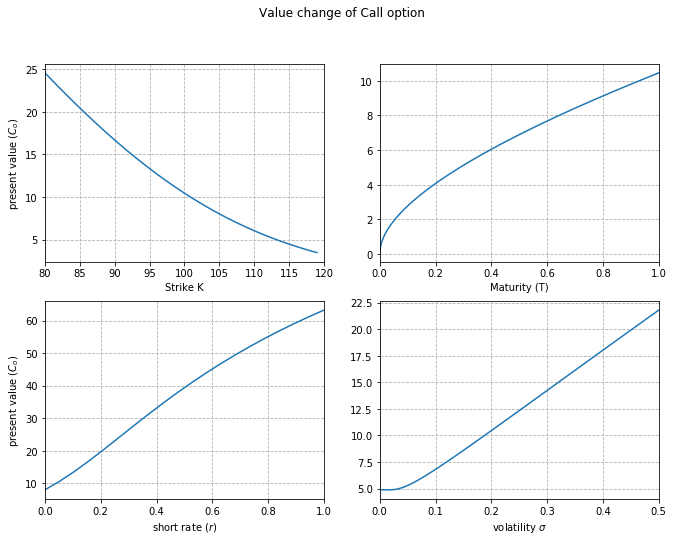

In [ ]:
# plots to show the varation of option value with paramters

f = plt.figure(figsize=(11,8))

f.suptitle('Value change of Call option')

plt.subplot(221)

# plot for option value change with Strike K
K = np.arange(80,120,1)
plt.plot(K,[BSM_call_value(100,k,1,0.05,.2) for k in K])
plt.xlabel('Strike K')
plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 80,120])

plt.subplot(222)

# plot for option value change with Maturity T
T = np.linspace(0.0001,1,10000)
plt.plot(T,[BSM_call_value(100,100,tt,0.05,.2) for tt in T])
plt.xlabel('Maturity (T)')
#plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 0,1])

# plot for option value change with interest rate (r)
plt.subplot(223)
R = np.linspace(0,1,20)
plt.plot(R,[BSM_call_value(100,100,1,r,.2) for r in R])
plt.xlabel('short rate ($r$)')
plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 0,1])

# plot for option value change with interest rate (r)
plt.subplot(224)
SIGMA = np.linspace(0,.5,100)
plt.plot(SIGMA,[BSM_call_value(100,100,1,.05,sig) for sig in SIGMA])
plt.xlabel('volatility $\sigma$')
#plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 0,.5])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


(0, 0.5)

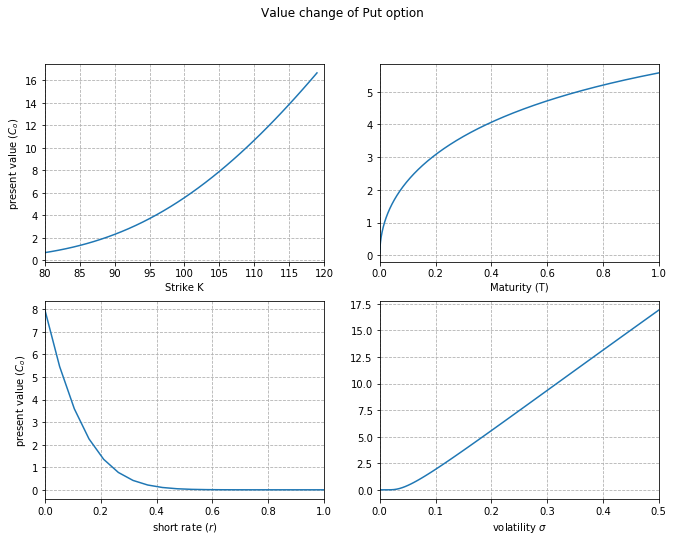

In [ ]:
# plots to show the varation of option value with paramters

f = plt.figure(figsize=(11,8))

f.suptitle('Value change of Put option')

plt.subplot(221)

# plot for option value change with Strike K
K = np.arange(80,120,1)
plt.plot(K,[BSM_put_value(100,k,1,0.05,.2) for k in K])
plt.xlabel('Strike K')
plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 80,120])

plt.subplot(222)

# plot for option value change with Maturity T
T = np.linspace(0.0001,1,10000)
plt.plot(T,[BSM_put_value(100,100,tt,0.05,.2) for tt in T])
plt.xlabel('Maturity (T)')
#plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 0,1])

# plot for option value change with interest rate (r)
plt.subplot(223)
R = np.linspace(0,1,20)
plt.plot(R,[BSM_put_value(100,100,1,r,.2) for r in R])
plt.xlabel('short rate ($r$)')
plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 0,1])

# plot for option value change with interest rate (r)
plt.subplot(224)
SIGMA = np.linspace(0,.5,100)
plt.plot(SIGMA,[BSM_put_value(100,100,1,.05,sig) for sig in SIGMA])
plt.xlabel('volatility $\sigma$')
#plt.ylabel('present value ($C_o$)')
plt.grid(True,linestyle='dashed')
plt.xlim([ 0,.5])


In [ ]:
# Intial Values Used
S0 = 100 # initial index level
K = 100 # strikeprice
T = 1.0  #maturity inyears
r = 0.05 #risk-lessshort rate
sigma = 0.2 #volatilityof the index level
t = 0 #valuation date, i.e.present date
q = 0 # divident rate 

In [ ]:
# First Order Greek's

# delta : first partial derivative of the option's value with respect to the 
# index level

def delta(So,K,T,r,sigma,t=0,q=0):
  from scipy import stats
  d1 = f_d1(So,K,T,r,sigma,t,q)
  N_d1 = stats.norm.cdf(d1,0,1)
  return N_d1

# Gamma: is the second order partial derivative with respect to the index level
# gamma is the rate of change of delta with respect to underlying stock's price

def gamma(So,K,T,r,sigma,t=0,q=0):
  from scipy import stats
  import math
  d1= f_d1(So,K,T,r,sigma,t,q)
  gamma = (math.exp(-q*(T-t))/(So*sigma*math.sqrt(T-t)))*(1/(math.sqrt(2*math.pi)))*(math.exp(-.5*d1**2))
  return gamma


# theta: measures the exposure of the option price to the passage of time
# measures the rate at which options price, especially in terms of the time value,
# changes or decrease as the time to expiry is approached

def theta(So,K,T,r,sigma,t=0,q=0):
  from scipy import stats
  import math
  d1= f_d1(So,K,T,r,sigma,t=0,q=0)
  d2= f_d2(So,K,T,r,sigma,t=0,q=0)
  theta = -((So*sigma*math.exp(-.5*d1**2)/(2*math.sqrt(T-t)*2*math.sqrt(2*math.pi))) + r*K*math.exp(-r*(T-t))*stats.norm.cdf(d2))/T
  return theta

# rho:: measures sensitivity to the interest rate
# first derivative with respect to short rate r

def rho(So,K,T,r,sigma,t=0,q=0):
  from scipy import stats
  import math
  d2= f_d2(So,K,T,r,sigma,t=0,q=0)
  rho = K*(T-t)*math.exp(-r*(T-t))*stats.norm.cdf(d2,0,1)
  return rho

# vega : partial derivative with respect to volitality


def vega(So,K,T,r,sigma,t=0,q=0):
  from scipy import stats
  import math
  d1 = f_d1(So,K,T,r,sigma,t,q)
  vega = So*(math.exp(-.5*d1**2)/math.sqrt(2*math.pi))*math.sqrt(T-t)
  return vega

In [ ]:
def plot_greeks(greek):
  
  """
  Input the name of greek you wish to plot
  
  Input should be a string
  """
  # Intial Values Used
  So = 100 # initial index level
  K = 100 # strikeprice
  T = 1.0  #maturity inyears
  r = 0.05 #risk-lessshort rate
  sigma = 0.2 #volatilityof the index level
  t = 0 #valuation date, i.e.present date
  q = 0 # divident rate 
  
  tlist = np.linspace(0.01, 1, 25)
  klist = np.linspace(80, 120, 25)
  V = np.zeros((len(tlist), len(klist)), dtype=np.float)
  for j in range(len(klist)):
    for i in range(len(tlist)):
      if greek=='delta':
        V[i, j] = delta(So, klist[j], tlist[i], r, sigma,t)
      elif greek=='gamma':
        V[i, j] = gamma(So, klist[j], tlist[i], r, sigma,t)
      elif greek=='theta':
        V[i, j] = theta(So, klist[j], tlist[i], r, sigma,t)
      elif greek=='rho':
        V[i, j] = rho(So, klist[j], tlist[i], r, sigma,t)
      elif greek=='vega':
        V[i, j] = vega(So, klist[j], tlist[i], r, sigma,t)

        
  x, y = np.meshgrid(klist, tlist)

  fig = plt.figure(figsize=(9, 5))
  plot = p3.Axes3D(fig)
  plot.plot_wireframe(x, y, V)
  plot.set_xlabel('strike $K$')
  plot.set_ylabel('maturity $T$')
  plot.set_zlabel('${}$ (K, T)'.format(greek) )
 

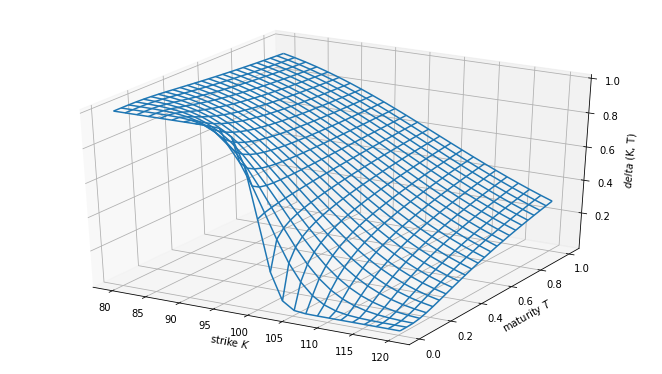

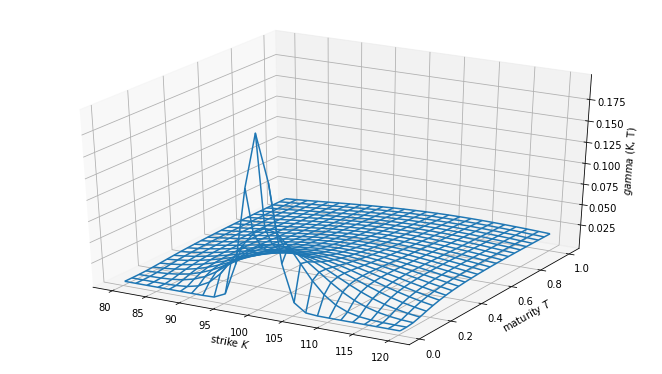

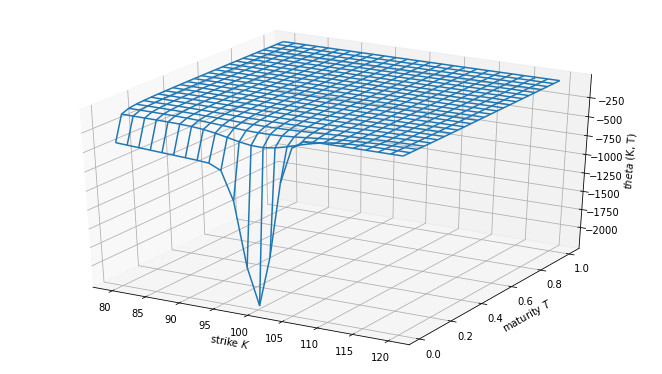

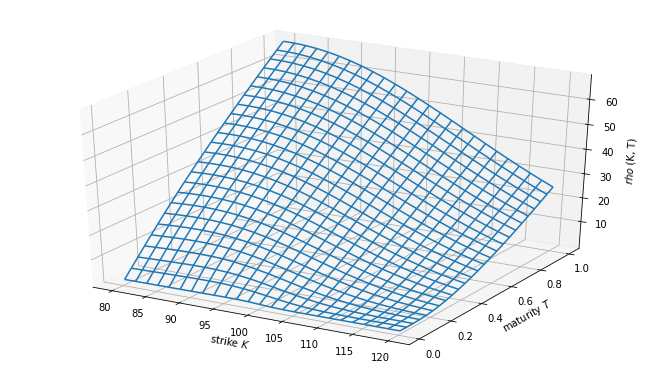

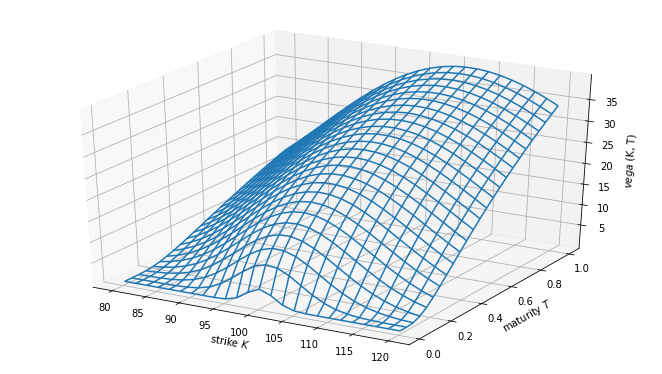

In [ ]:
for greek in ['delta','gamma','theta','rho','vega']:
  plot_greeks(greek)